<a href="https://colab.research.google.com/github/Sansith/gpt2sp/blob/gpt2sp-base/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Year4/FYP/effort-estimation/gpt2sp

/content/drive/MyDrive/Year4/FYP/effort-estimation/gpt2sp


In [5]:
pip install torch pandas transformers numpy tokenizers koila

In [14]:
from transformers import GPT2Tokenizer , BigBirdTokenizer
import pandas as pd
import matplotlib.pyplot as plt

## Token count

In [26]:
def get_token_counts(df,threshold_count,tokenizer,ds_name):
  # Create an empty list to store token lengths
  token_lengths = []
  has_more_than_1000_tokens = []
  max_token_count = 0
  # Iterate over the rows of your dataset
  for text in df["description"]:
      # Tokenize the text
      tokens = tokenizer.encode(text=str(text))
      max_token_count = len(tokens) if max_token_count < len(tokens)  else max_token_count
      if len(tokens) > threshold_count:
          has_more_than_1000_tokens.append(True)
      else:
          has_more_than_1000_tokens.append(False)
      # Append the length of the tokenized sequence to the list
      token_lengths.append(len(tokens))
  # Plot the distribution of token lengths
  plt.figure(figsize=(5, 3))
  plt.hist(token_lengths, bins=50, edgecolor='black')
  plt.title('Token Length Distribution:'+ds_name)
  plt.xlabel('Token Length')
  plt.ylabel('Count')
  plt.show()

  # Count the number of True values in the list
  num_records_above_t = sum(has_more_than_1000_tokens)
  print(f"Number of records with more than 1000 tokens: {num_records_above_t}")
  print('Max token count ', max_token_count)

  return num_records_above_t

In [28]:
# Read the CSV files into Pandas DataFrames
TRAIN_TEST_FILE_PAIRS = [
                        {'train': ['appceleratorstudio'], 'test': ['appceleratorstudio']},
                        {'train': ['aptanastudio'], 'test': ['aptanastudio']},
                        {'train': ['bamboo'], 'test': ['bamboo']},
                        {'train': ['clover'], 'test': ['clover']},
                        {'train': ['datamanagement'], 'test': ['datamanagement']},
                        {'train': ['duracloud'], 'test': ['duracloud']},
                        {'train': ['jirasoftware'], 'test': ['jirasoftware']},
                        {'train': ['mesos'], 'test': ['mesos']},
                        {'train': ['moodle'], 'test': ['moodle']},
                        {'train': ['mule'], 'test': ['mule']},
                        {'train': ['mulestudio'], 'test': ['mulestudio']},
                        {'train': ['springxd'], 'test': ['springxd']},
                        {'train': ['talenddataquality'], 'test': ['talenddataquality']},
                        {'train': ['talendesb'], 'test': ['talendesb']},
                        {'train': ['titanium'], 'test': ['titanium']},
                        {'train': ['usergrid'], 'test': ['usergrid']},
                        ]

def run_on_data_sets(tokenizer):
  more_than_threshold_counts =[]
  tokenizer_type = type(tokenizer).__name__

  for file in TRAIN_TEST_FILE_PAIRS:
    df = pd.read_csv("./sp_dataset/marked_data/"+ file["train"][0] +".csv")
    df.fillna(' ')
    print("----------------------------------file: ",file['train'][0])

    count =  get_token_counts(df,1000,tokenizer,file["train"][0])
    more_than_threshold_counts.append(count)

  ds_names = sum([item['train'] for item in TRAIN_TEST_FILE_PAIRS], [])
  # Plot the counts for each dataset
  plt.figure(figsize=(10, 6))
  plt.bar(range(len(more_than_threshold_counts)), list(more_than_threshold_counts), align='center')
  plt.xticks(range(len(more_than_threshold_counts)), list(ds_names), rotation=90)
  plt.title('Number of Records with More Than 1000 Tokens :'+ tokenizer_type)
  plt.xlabel('Dataset')
  plt.ylabel('Count')
  plt.show()

### GPT2Tokenizer


Token indices sequence length is longer than the specified maximum sequence length for this model (4906 > 1024). Running this sequence through the model will result in indexing errors


----------------------------------file:  appceleratorstudio


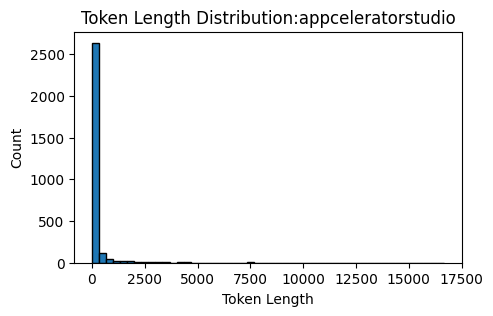

Number of records with more than 1000 tokens: 121
Max token count  16682
----------------------------------file:  aptanastudio


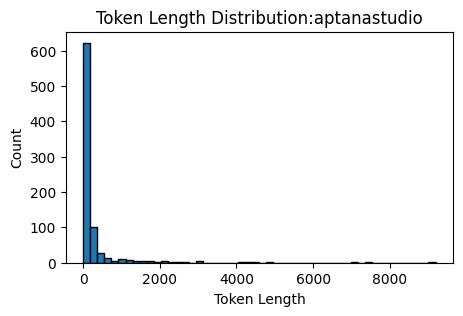

Number of records with more than 1000 tokens: 56
Max token count  9197
----------------------------------file:  bamboo


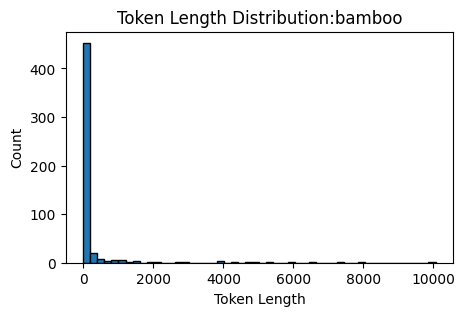

Number of records with more than 1000 tokens: 31
Max token count  10060
----------------------------------file:  clover


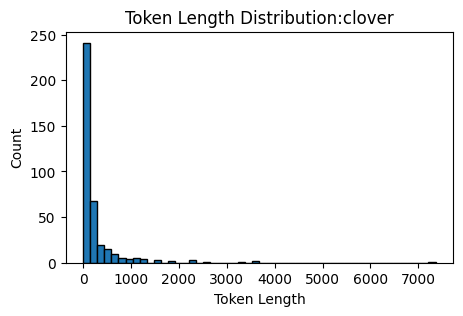

Number of records with more than 1000 tokens: 22
Max token count  7361
----------------------------------file:  datamanagement


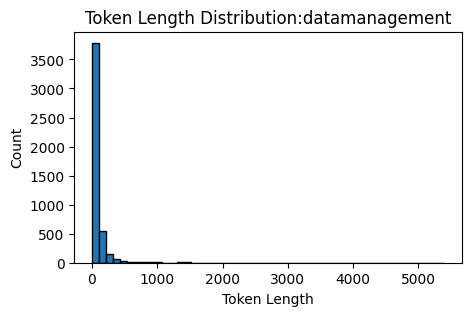

Number of records with more than 1000 tokens: 45
Max token count  5397
----------------------------------file:  duracloud


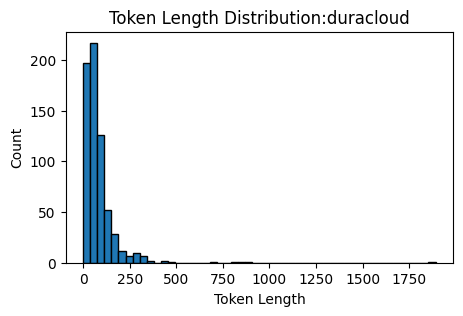

Number of records with more than 1000 tokens: 1
Max token count  1891
----------------------------------file:  jirasoftware


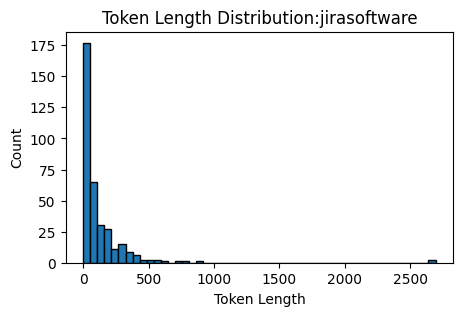

Number of records with more than 1000 tokens: 2
Max token count  2692
----------------------------------file:  mesos


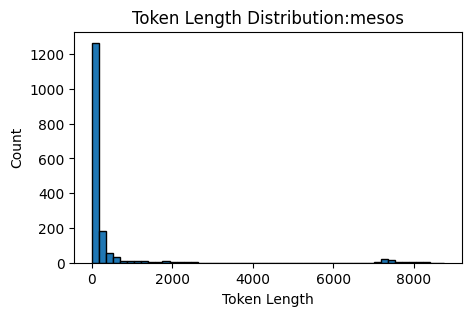

Number of records with more than 1000 tokens: 124
Max token count  8753
----------------------------------file:  moodle


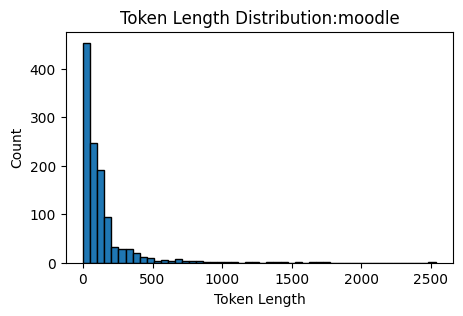

Number of records with more than 1000 tokens: 14
Max token count  2534
----------------------------------file:  mule


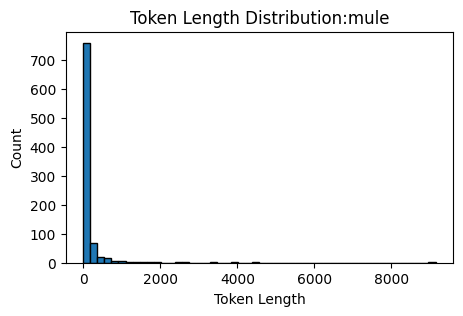

Number of records with more than 1000 tokens: 21
Max token count  9144
----------------------------------file:  mulestudio


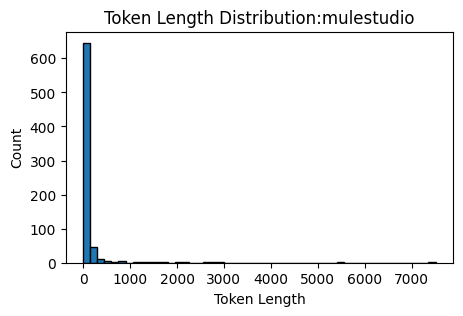

Number of records with more than 1000 tokens: 19
Max token count  7512
----------------------------------file:  springxd


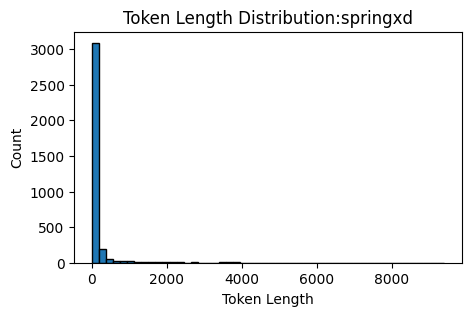

Number of records with more than 1000 tokens: 127
Max token count  9409
----------------------------------file:  talenddataquality


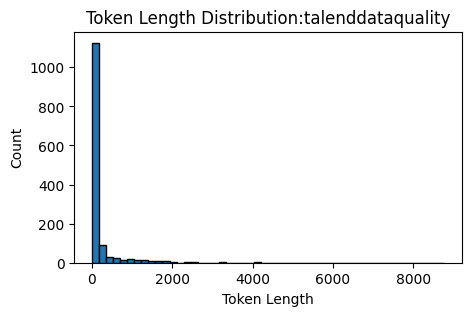

Number of records with more than 1000 tokens: 80
Max token count  8769
----------------------------------file:  talendesb


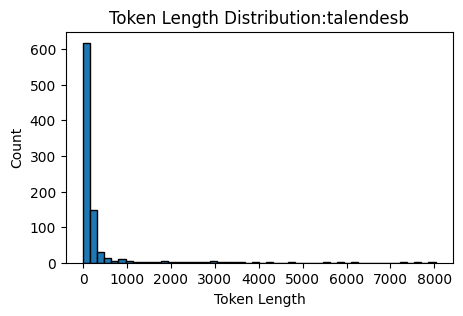

Number of records with more than 1000 tokens: 44
Max token count  8028
----------------------------------file:  titanium


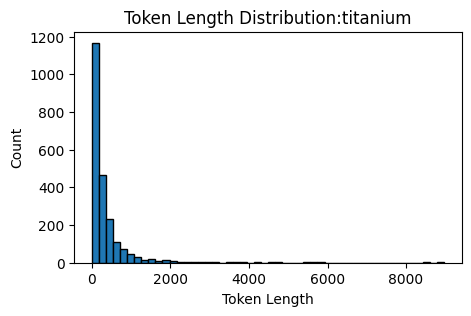

Number of records with more than 1000 tokens: 167
Max token count  8975
----------------------------------file:  usergrid


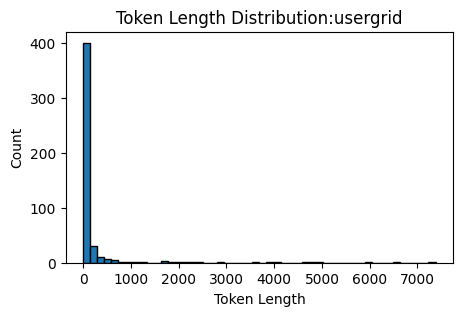

Number of records with more than 1000 tokens: 24
Max token count  7378


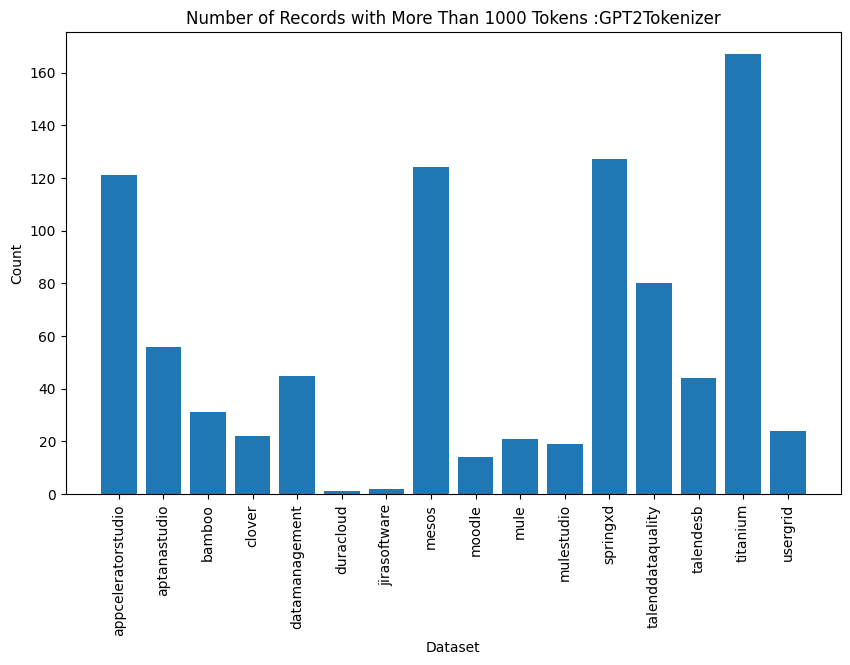

In [29]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
run_on_data_sets(tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (4573 > 4096). Running this sequence through the model will result in indexing errors


----------------------------------file:  appceleratorstudio
Number of records with more than 1000 tokens: 112
Max token count  8200
----------------------------------file:  aptanastudio
Number of records with more than 1000 tokens: 48
Max token count  8739
----------------------------------file:  bamboo
Number of records with more than 1000 tokens: 31
Max token count  6795
----------------------------------file:  clover
Number of records with more than 1000 tokens: 18
Max token count  6756
----------------------------------file:  datamanagement
Number of records with more than 1000 tokens: 32
Max token count  4045
----------------------------------file:  duracloud
Number of records with more than 1000 tokens: 1
Max token count  1770
----------------------------------file:  jirasoftware
Number of records with more than 1000 tokens: 2
Max token count  2316
----------------------------------file:  mesos
Number of records with more than 1000 tokens: 108
Max token count  8431
--------------

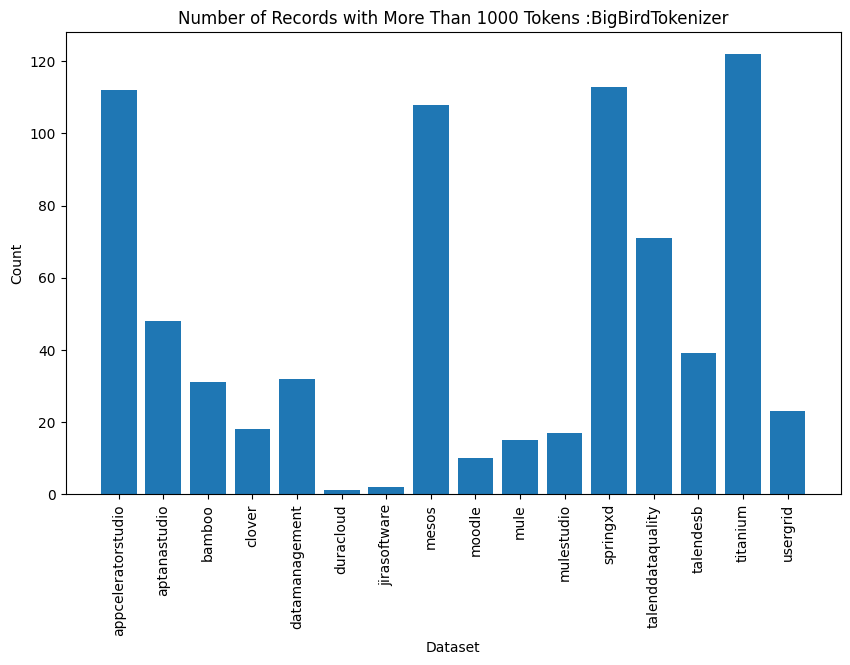

In [25]:
tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')
run_on_data_sets(tokenizer)